<a href="https://colab.research.google.com/github/piquelab/popgen-notes/blob/master/colab/QT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The convergence of the phenotypic distribution to a normal distribution
---

This google colab has been created from code modified from Graham Coop [here](https://github.com/cooplab/popgen-notes/blob/master/Rcode/Quant_gen/QT1.R)




In [1]:
##Quantitative genetics sims

pheno.geno<-function(L,environ.var){
allele.freq<-0.5   ###each locus is assumed to have the same allele frequencies. This is just to simplify the coding, in reality these results work when each locus has its own frequency (and the coding wouldn't be too much harder).

###L try values between 2 and 100
Num_inds=10000

 ## try some values between zero and (say) 5.
					### the genetic component is scaled below so that its variance is 1
					##thus you only need play with the environmetal variance

##MAKE A MUM
## For each mother, at each locus we draw an allele (either 0 or 1) from the population allele frequency.
##We do this twice for each mother two represent the two haplotypes in the mother
mum.hap.1<-replicate(Num_inds, rbinom(L,1,allele.freq) )
mum.hap.2<-replicate(Num_inds, rbinom(L,1,allele.freq) )
##type mum.hap.1[,1] to see the 1st mothers 1st haplotype


##Each mothers genotype at each locus is either 0,1,2
mum.geno<-mum.hap.1+mum.hap.2

##assuming that each allele at locus has the same effect on phenotype, sum the genotypes to get the additive genetic "phenotype"

if(L>1){ additive.genetic<-colSums(mum.geno)}
if(L==1){ additive.genetic<-mum.geno}

##I normalize this to have variance 1, to make it comparable to the environmental variance.
additive.genetic<-additive.genetic / sd(additive.genetic)

##add the environmental contribution to the trait to get the overall phenotype
mum.pheno<- additive.genetic + rnorm(Num_inds,sd=sqrt(environ.var))

##normalize the trait to have mean zero
mum.pheno<-mum.pheno-mean(mum.pheno)

##plot a histogram of the distribution of the phenotype within the population
#layout(1) ###done in case this is run after the code with 3 plots
hist(mum.pheno,breaks=1000,xlab="Phenotype",main=paste("L=",L,", VE=",environ.var,", VA=1.",sep=""),cex.lab=1.5,cex.axis=1.5,cex.main=1.5)

}



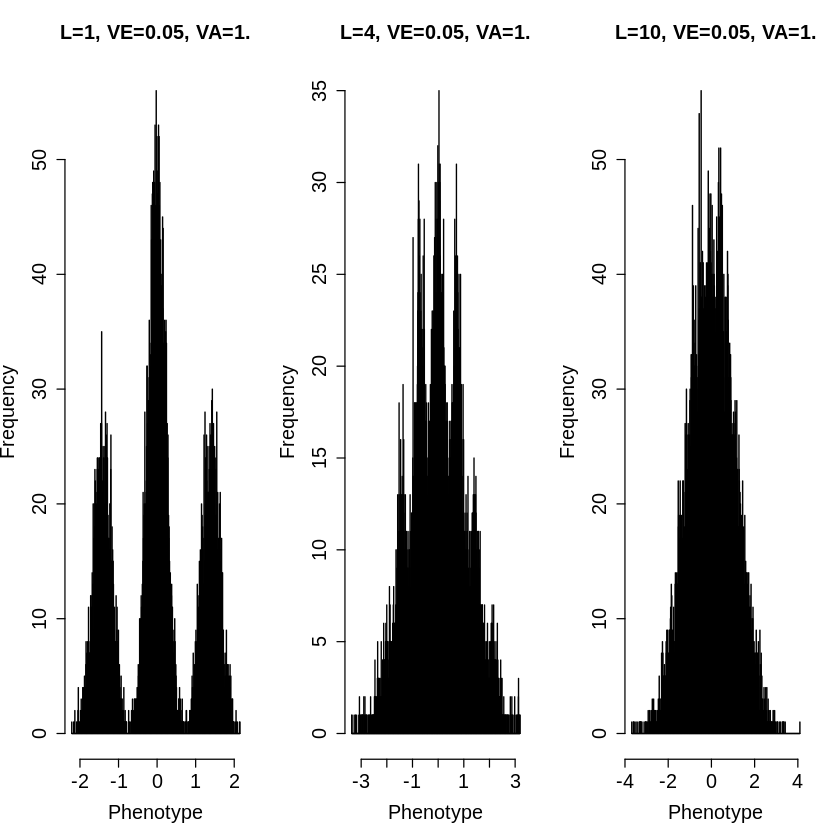

In [6]:
layout(t(1:3))
pheno.geno(L=1,environ.var=.05)
pheno.geno(L=4,environ.var=.05)
pheno.geno(L=10,environ.var=.05)
